In [1]:
import numpy as np
import pandas as pd

# datos
# https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data




import unicodedata, re, string
import nltk



import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

# https://raw.githubusercontent.com/GabrielGlez/ProgAdv/master/labeledTrainData.tsv




df_train = pd.read_csv("https://raw.githubusercontent.com/GabrielGlez/ProgAdv/master/labeledTrainData.tsv", sep='\t')



df_train.head()

# ud id del comentario
# 0 - negative
# 1 - positive

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
listatextos = df_train["review"][:1000]

In [3]:
len(listatextos)

1000

In [4]:
listatextos[5]

'I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5'

In [5]:
etiquetas = df_train["sentiment"][:1000]

In [6]:
# representacion TF-IDF

# Lista_de_documentos_textos
# etiquetas ???

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer( analyzer = "word", ngram_range=(1, 1), stop_words='english' ,  min_df = 20, token_pattern = r"\w+", binary=False )  # se apaga conteo binario

# genero representacion tfidf
representacion_tfidf = tf.fit_transform(listatextos).toarray()

vocabulario_attributos = tf.get_feature_names()

print("vocabulario:",len(vocabulario_attributos))
print("primeros 20 atributos:",vocabulario_attributos[:20])
print("primer instacia sus primeras 20 atrubutos:")
print(representacion_tfidf[0][:50])





vocabulario: 844
primeros 20 atributos: ['1', '10', '15', '2', '20', '3', '30', '4', '40', '5', '6', '7', '8', '9', 'able', 'absolutely', 'act', 'acted', 'acting', 'action']
primer instacia sus primeras 20 atrubutos:
[0.         0.         0.         0.         0.08800641 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0867768  0.
 0.         0.        ]


In [7]:
from sklearn import tree

X = representacion_tfidf
y = etiquetas

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(304.7248170206659, 214.24235294117648, 'X[829] <= 0.045\ngini = 0.499\nsamples = 1000\nvalue = [518, 482]'),
 Text(280.79980625717565, 207.8470588235294, 'X[319] <= 0.068\ngini = 0.498\nsamples = 900\nvalue = [423, 477]'),
 Text(248.32521526980483, 201.45176470588234, 'X[57] <= 0.08\ngini = 0.498\nsamples = 731\nvalue = [388, 343]'),
 Text(209.51426521239955, 195.0564705882353, 'X[716] <= 0.054\ngini = 0.5\nsamples = 637\nvalue = [312, 325]'),
 Text(182.24690011481056, 188.66117647058823, 'X[799] <= 0.048\ngini = 0.48\nsamples = 365\nvalue = [146, 219]'),
 Text(169.6102181400689, 182.26588235294116, 'X[386] <= 0.126\ngini = 0.471\nsamples = 351\nvalue = [133, 218]'),
 Text(153.56211251435133, 175.87058823529412, 'X[442] <= 0.051\ngini = 0.457\nsamples = 331\nvalue = [117, 214]'),
 Text(136.84133180252584, 169.47529411764705, 'X[830] <= 0.055\ngini = 0.478\nsamples = 278\nvalue = [110, 168]'),
 Text(128.0004592422503, 163.07999999999998, 'X[398] <= 0.086\ngini = 0.466\nsamples = 2

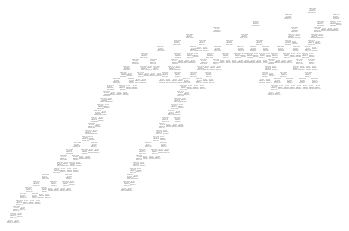

In [8]:
tree.plot_tree(clf) 

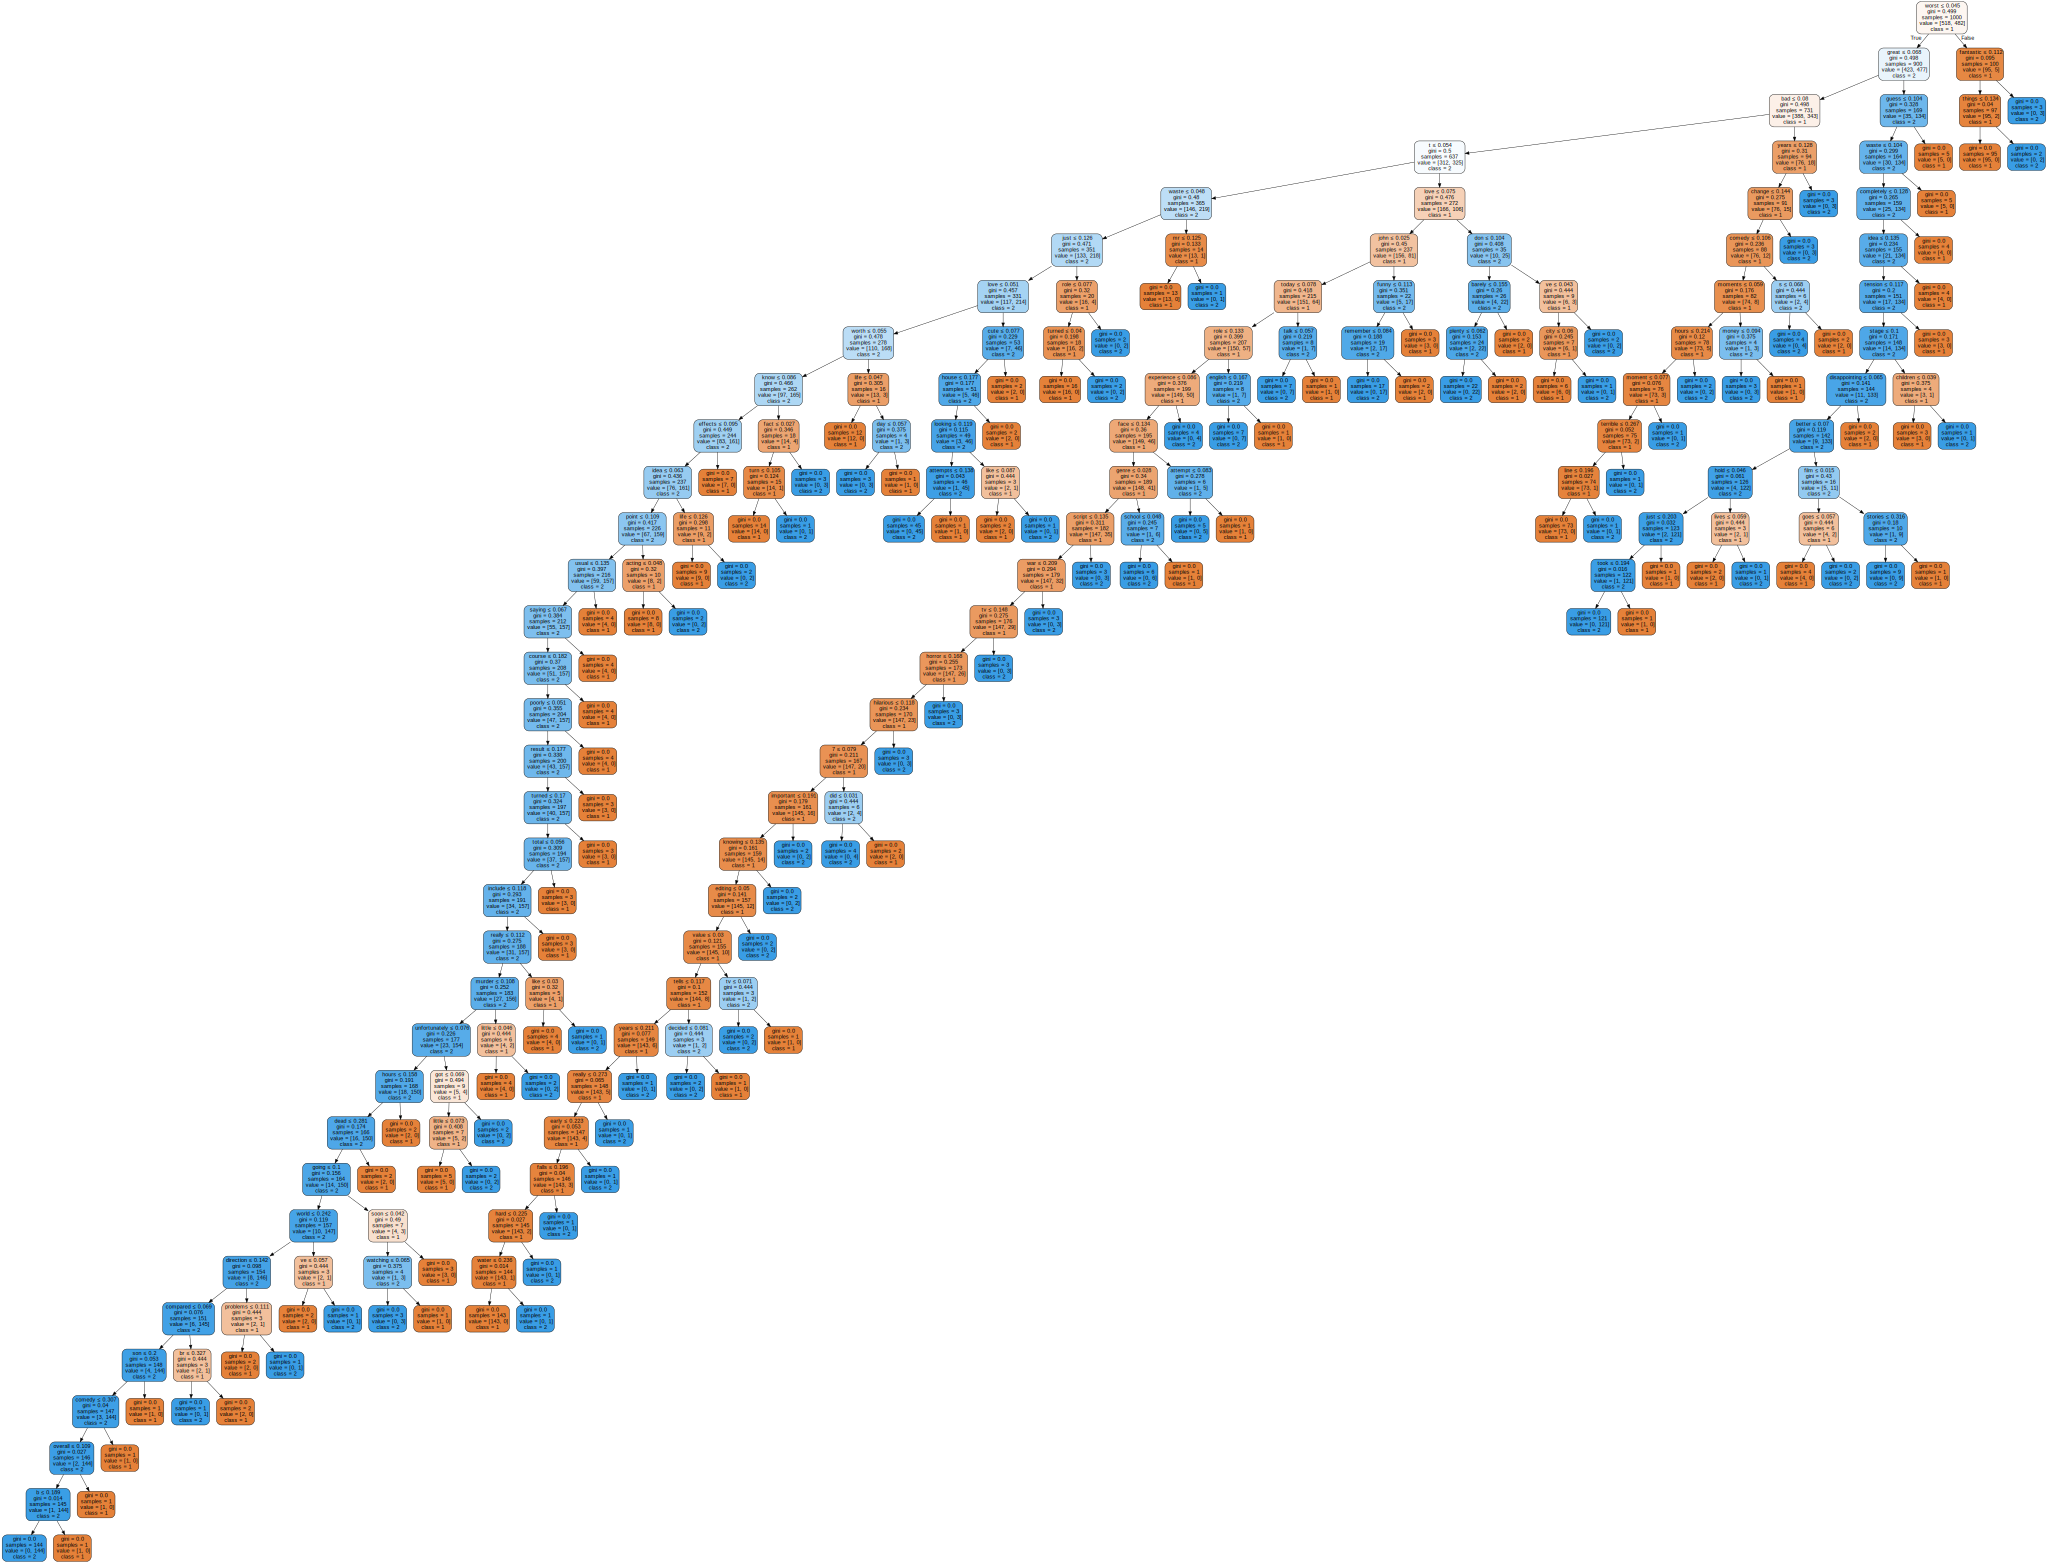

In [9]:
import graphviz 


dot_data = tree.export_graphviz(clf, out_file=None, feature_names=vocabulario_attributos, 
                                class_names=["1","2","3","4","5"], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)   
graph.render("review") 



graph 


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = representacion_tfidf
y = etiquetas

clf = tree.DecisionTreeClassifier(random_state=0)

print("Validacion a 10 pliegues")
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

cv = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


print("exactitud por cada pliegue")
print(cv)
print("exactitud promedio ")
print(cv.mean())
print("desviacion estandar de promedio de exactitud ")
print(cv.std())


Validacion a 10 pliegues
exactitud por cada pliegue
[0.62376238 0.58415842 0.63       0.66       0.61       0.54
 0.73       0.67       0.60606061 0.65656566]
exactitud promedio 
0.6310547054705471
desviacion estandar de promedio de exactitud 
0.049404517448314346


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

X = representacion_tfidf
y = etiquetas

# Ahora podemos probar rápidamente un conjunto de entrenamiento mientras conservamos el 40% de los datos para probar (evaluar) nuestro clasificador:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Conjunto de entrenamiento 70% ")
print(len(X_train))

print("Conjunto de prueba 30% ")
print(len(X_test))

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

print("Exactitud ")
print(clf.score(X_test, y_test))

preds = clf.predict(X_test)


Conjunto de entrenamiento 70% 
700
Conjunto de prueba 30% 
300
Exactitud 
0.5933333333333334


In [12]:
# Resuelto se crea frame de pandas y luego se crea matriz de confusion
import pandas as pd

y_true = y_test
y_pred = list(preds)

df = pd.DataFrame({'y_true': y_true,
                   'y_pred': y_pred})

cm = pd.crosstab(df['y_true'], df['y_pred'])
print(cm)

y_pred   0   1
y_true        
0       85  66
1       56  93


In [13]:
# Otra forma mas sencilla

from sklearn.metrics import confusion_matrix

y_pred = list(preds)
y_true = y_test

confusion_matrix(y_true, y_pred)

array([[85, 66],
       [56, 93]], dtype=int64)

In [14]:
set(y_test)

{0, 1}

In [15]:
len(y_test)

300

In [16]:
set(preds)

{0, 1}

In [17]:
len(preds)

300

In [18]:
list(preds[:20])

[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]

In [19]:
y_test[:20]

993    1
859    0
298    0
553    1
672    1
971    1
27     0
231    1
306    1
706    0
496    1
558    0
784    1
239    0
578    1
55     0
906    0
175    0
14     0
77     1
Name: sentiment, dtype: int64

In [20]:
list(preds[:20])

[0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]

Grafica las instancias del corpus reduciendo su dimensionalidad con PCA (Principal component analysis) a dos características y grafica al árbol de decisión

In [21]:
# reduciendo su dimensionalidad con PCA

X = representacion_tfidf
y = etiquetas

len(X[0])

844

In [22]:
# 647 -> 2  PCA

In [23]:
from sklearn.decomposition import PCA

X = representacion_tfidf
y = etiquetas # no la usamos

X_reduced = PCA(n_components=2).fit_transform(X)


In [24]:
X_reduced[0]

array([0.09306822, 0.09109794])

In [25]:
X_reduced[1]

array([-0.19848481, -0.02279293])

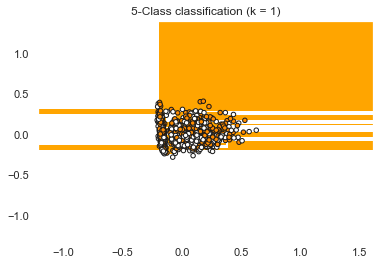

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_reduced
y = etiquetas # no la usamos

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue','yellow','white'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue','yellow','white'])

for n_neighbors in [1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("5-Class classification (k = %i)"
              % (n_neighbors))

plt.show()

In [27]:
y_test[:20]

993    1
859    0
298    0
553    1
672    1
971    1
27     0
231    1
306    1
706    0
496    1
558    0
784    1
239    0
578    1
55     0
906    0
175    0
14     0
77     1
Name: sentiment, dtype: int64

In [28]:
list(preds)

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [29]:
from nltk import word_tokenize
tokens = word_tokenize(raw)           # tokeniza
words = [w.lower() for w in tokens]   # normaliza a minisculas
vocab = sorted(set(words))            # ordena y obtiene vocabulario
type(vocab)
print("tokens - palabras con simbolos:",len(tokens))
print("palabras en minusculas",len(words))
print("vocabulario:",len(vocab))

NameError: name 'raw' is not defined

In [30]:
import nltk
#lista de terminos mas frecuentes y su frecuencia
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

NameError: name 'tokens' is not defined

In [31]:
#valores que solo se muestran una sola vez en el documento
for key,val in freq.items():
    if(val==1):
        print (str(key) + ':' + str(val))

NameError: name 'freq' is not defined

In [32]:
#con el uso de la variable freciuencia tomamos 
#20 valores de las pabras repetidas en el documento
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

NameError: name 'tokens' is not defined

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')
#palabras vacias en su idioma

tokenizer = nltk.RegexpTokenizer(r"\w+")  # solo selecciona palabras \w+
new_tokens = tokenizer.tokenize(raw)

sr = stopwords.words('english')
words = [w for w in new_tokens if w.lower() not in sr]    # normaliza a minisculas

NameError: name 'raw' is not defined

In [ ]:
len(words)